In [14]:
from rdkit.Chem import AllChem as Chem
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from rdkit.Chem.Draw import IPythonConsole
import seaborn as sns
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 800, 800

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
cm = 1/2.54
def annotate(data, **kws):
    r, p = pearsonr(data["dft_shift"], data["experimental_shift"])
    mae = mean_absolute_error(data["dft_shift"], data["experimental_shift"])
    rmse = np.sqrt(mean_squared_error(data["dft_shift"], data["experimental_shift"]))
    ax = plt.gca()
    ax.text(0.10, 0.85, f"$\\rho$: {r : .4f}", transform=ax.transAxes)
    ax.text(0.10, 0.79, f"MAE: { mae: .2f} ppm", transform=ax.transAxes)
    ax.text(0.10, 0.73, f"RMSE: { rmse: .2f} ppm", transform=ax.transAxes)
sns.set_style("ticks")
sns.set_context("paper")

# FF Geomtries

In [16]:
corrected = pd.read_csv("dft_vs_exp_correct.csv")

In [17]:
mean_absolute_error(corrected["experimental_shift"], corrected["dft_shift"])

2.2069603135222553

In [18]:
np.sqrt(mean_squared_error(corrected["experimental_shift"], corrected["dft_shift"]))

3.307487512168106

In [19]:
corrected["error"] = corrected["dft_shift"] - corrected["experimental_shift"]
MAEM = corrected[["mol_idx", "error"]].groupby("mol_idx").agg(lambda x : np.mean(np.abs(x)))
np.average(MAEM)

2.295657435895214

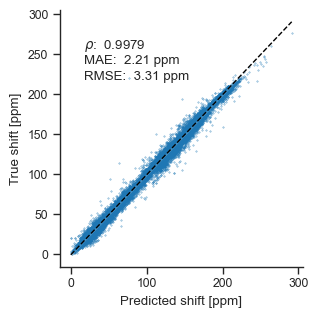

In [20]:
plot = sns.lmplot(
            corrected,
            x="dft_shift",
            y="experimental_shift",
            line_kws={"color": "black", "linestyle": "dashed", "linewidth": 1},
            scatter_kws={"s": 0.1},
        )
plot.set_xlabels("Predicted shift [ppm]")
plot.set_ylabels("True shift [ppm]")
plot.map_dataframe(annotate)
plot.figure.set_size_inches(8.3 * cm, 8.3 * cm)
plot.tight_layout()
plot.savefig("forcefield_geom.pdf", dpi=800)
plot.savefig("forcefield_geom.tiff", dpi=800)
plot

# DFT Geomtries

In [21]:
corrected = pd.read_csv("dft_vs_exp_correct_DFT_geom.csv")

In [22]:
mean_absolute_error(corrected["experimental_shift"], corrected["dft_shift"])

2.2090153132839956

In [23]:
np.sqrt(mean_squared_error(corrected["experimental_shift"], corrected["dft_shift"]))

3.311104897424885

In [24]:
corrected["error"] = corrected["dft_shift"] - corrected["experimental_shift"]
MAEM = corrected[["mol_idx", "error"]].groupby("mol_idx").agg(lambda x : np.mean(np.abs(x)))
np.average(MAEM)

2.2976055189219413

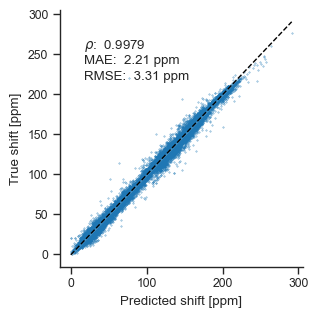

In [25]:
plot = sns.lmplot(
            corrected,
            x="dft_shift",
            y="experimental_shift",
            line_kws={"color": "black", "linestyle": "dashed", "linewidth": 1},
            scatter_kws={"s": 0.1},
        )
plot.set_xlabels("Predicted shift [ppm]")
plot.set_ylabels("True shift [ppm]")
plot.map_dataframe(annotate)
plot.figure.set_size_inches(8.3 * cm, 8.3 * cm)
plot.tight_layout()
plot.savefig("dft_geom.pdf", dpi=800)
plot.savefig("dft.tiff", dpi=800)